In [2]:
# execute this cell before you start the lecture
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing(use_latex="mathjax")
x, y, z, t = sym.symbols('x y z t')

# Representation of numbers in the computer 

## Bits

A computer has different ways of representing numbers and other information internally. The basic element of storing information is called a **bit**, which can either be zero or one, or equivalently `True` or `False`. In Python you can define variables of type `bool` which have this property:

In [ ]:
a = True
type(a)

In [ ]:
b = False

print(a and b)
print(a and not b)

Algebra based on variables of type `bool` is called Boolean algebra.

## Bytes

A collection of eight bits is called a **byte**, and is able to store $2^8=256$ different values. It is a matter of convention to associate a particular sequence of bits with any particular meaning.  For example we can use the binary system of numbers to assign the bit sequence `0000 0001` the number 1, the sequence `0000 0010` the number 2, and so on up to `1111 1111` which is assigned the number 255.  This would be an interpretation of a byte as an *unsigned number* running from 0 to 255.  In `Python` you can use the builtin function `bin()` to obtain the bit sequence of a number:

In [ ]:
bin(17)

If you want to do the reverse, i.e. go from a bit sequence to a number you can use `int(, base=2)`.

In [ ]:
int("10001",base=2)

How can we represent numbers which are both, positive or negative? One option is to simply reserve one bit (for example the leftmost one) to indicate the sign and then use the remainding bits to represent a binary number as before. In this representation, the number $-1$ would be represented by `1000 0001`. This is however *not* what is most commonly used in the computer. Instead the most common way of accomodating  the numbers from -128 to +128 is as follows: 

signed decimal | binary| unsigned decimal
---|---
-128 | 1000 0000 | 128
-127 | 1000 0001 | 129
... | ... | ...
-2 | 1111 1110 |254
-1 | 1111 1111 |255
0 | 0000 0000 |0 
1 | 0000 0001 |1 
... | ... |...
126 | 0111 1110| 126
127 | 0111 1111| 127

This way of representing signed integers is called [Two's complement](http://en.wikipedia.org/wiki/Two%27s_complement) representation.  In this notation we see that again the highest bit carries the information about the sign of the number.

If integer numbers outside the interval $[-128,127]$ are required, then more than one byte is used. In python, the internal representation of integer numbers is hidden from the user (try `bin(-17)`), and usually everything *just works*, but it is still good to know, what goes on inside. 

## Floating Point Numbers

In mathematical applications we often would like to work with *real* numbers, i.e. numbers in the set $\mathbb{R}$. In introductory analysis courses you learn that this set is quite big (uncountable), and it is therefore clear that we cannot hope to represent all real numbers on a computer with finite memory.  

To represent numbers, which are not integers, the computer uses a special format, called *floating point format*. Understanding this format and its limitations are crucial for doing mathematical calculations on the computer. 

In floating point representation a number $q$ is represented in the format
\begin{equation}
q = s \times 2^{e}
\end{equation}
where $s$ is called the *significand* and $e$ is called the *exponent*. Both,  the exponent and significand are integers and can be negative or positive. 

The first thing to note is that the representaion of a number in this form is not unique. For example
the number $q=1$ can be represented as $1 = 1 \times 2^0$, i.e. $(e, s) = (0, 1)$.  However it can also be represented as $1 = 2 \times 2^{-1}$ or $1 = 64 \times 2^{-6}$. This means all pairs $(e, s) = ( -k, 2^k)$ for all $k$ represent the same number $q=1$. More generally we can write that for any number $q$ represented by $(e,s)$ we have
\begin{equation}
q \equiv (e - k, s \times 2^{k} ) \quad \forall k \in \mathbb{Z}
\end{equation}
The computer will usually use the representation where the number $e$ is as small as possible and the modulus of $s$ is as big as possible. 

The second thing to note is that not all real numbers can be precisedly represented in the form $q = s \times 2^{e}$.  For example the decimal number $q=0.1 = \frac{1}{10}$ can only be approximated, but not be precisely expressed:
\begin{align}
  6553\times 2^{-16} &= (-16, 6553) &\approx&\, 0.0999908447265625 \\
  6554\times 2^{-16} &= (-16, 6554) &\approx&\, 0.100006103515625 \\
  429496729 \times 2^{-32} &= (-32, 429496729) &\approx&\, 0.09999999986030161 \\
  429496730 \times 2^{-32} &= (-32, 429496730) &\approx&\, 0.10000000009313226
\end{align}

When a floating point number is stored in the computer, what is actually stored is the pair $(e,s)$ where both $e$ and $s$ are integers.  Both $e$ and $s$ need to fit into a given space of typically 8 bytes = 64 bits for  the standard double precision used in python. 

Of these 64 bits, typically 11 bits are reserved for the exponent, 52 bits for the significant, and one bit  for the sign. (I simplify slightly here. If you are interested in the technical details of how exponent and significant are really stored on a bit level have a look at some [more detailed documentaion](http://steve.hollasch.net/cgindex/coding/ieeefloat.html) of the relevant standard.)

Using 52 bits, the computer can represent numbers up to to $2^{53}-1 = 9007199254740991$, which is a 16 digit number in decimal representation.  This is the largest number, which can be represented with exponent $e=0$, i.e. $(0,2^{53}-1)$. The next number $2^{53}$ needs to be represented with exponent 1, i.e. $(1,2^{52})$. But how do we then represent $2^{53}+1$. Have a look:

In [ ]:
float(2**53)-1, float(2**53), float(2**53) +1

As a consequence, it follows that numbers in a computer are typically stored with a precision of less than 16 decimal digits. Consider the following calculation:

In [ ]:
print(1.0 - 1.0 + 1.0e-10)
print(1.0 + 1.0e-10 - 1.0)

Note that in the first case, we do get 1.0e-10 as expected. However, in the second line we only changed the order of the operations.  Although this second line should yield the same result as the first, it actually gives a different result already at the eight position after the decimal point.  This might not sound dramatic, but look at the following:

In [ ]:
print(1.0 - 1.0 + 1.0e-15)
print(1.0 + 1.0e-15 - 1.0)

Now we get it wrong by 10%, which might not be tolerable for certain applications.  But it even gets worse:

In [ ]:
print(1.0 - 1.0 + 1.0e-16)
print(1.0 + 1.0e-16 - 1.0)

Now in the second case, the answer is zero, while it should be $1\times 10^{-16}$! The problem is that we have subtracted two numbers of almost equal size, and the computer could not represent them as two different numbers, because of the finite size of the significant. 

You might argue that this number is so small that we might neglect it, but we can also do:

In [ ]:
print(1.0e16 - 1.0e16 + 1.0)
print(1.0e16 + 1.0 - 1.0e16)

Now the difference between the operations is 1, which is not small. The reason for these effects is the way the computer adds numbers in floating point representaion. Consider for example the problem of summing  two numbers $q_1 \equiv (e_1, s_1)$ and $q_2 \equiv (e_2, s_2)$ with $e_1 > e_2$.  Then the sum of these two numbers is calculated as follows:
\begin{equation}
q_1 + q_2 \equiv (e_1, s_1) + (e_2, s_2) = (e_1, s_1) + (e_1, s_2 \times 2^{e_2 - e_1}) = (e_1, s_1 + s_2 \times 2^{e_2 - e_1})
\end{equation}

If now $e_1 - e_2$ is bigger than the number of bits that can be stored in $s$, then $s_2 \times 2^{e_2 - e_1}$ will be zero, and therefore the computer will wrongly calculate $q_1 + q_2 = q_1$

What we learn from this, is that computers (not only python) per default often work with a precision of around 15 significant decimal digits. This is the standard machine precision (sometimes called "double precision"). 

What is now important to understand is that the number 1.0e-16 is be no means the smallest number that can be represented. It is just the limitation in relative precision through the finite size of the significant. 

The smallest number different from zero is much smaller:

In [ ]:
print(2.0**(-2**10))
print(2.0**(-2**10-50))
print(2.0**(-2**10-51))

This means that the smallest numbers which can be represented by the computer and are different from zero are of the order of $10^{-324}$. This limitation comes from the 11 bits which are reserved for the exponent.  Similarly the biggest representable numbers can be obtained through:

In [ ]:
print(2.0**(2**9))
print(2.0**(2**10-1))
print(2.0**(2**10))

This means that we can represent numbers up to around $1.0\times 10^{307}$, a limitation which again is given through the limited bits of the exponent. 


One should also note that because numbers are represented in binary representation in the computer, numbers like 0.1 or 0.2 cannot be represented exactly in the computer.  This is similar to the problem of representing $1/3 \approx 0.3333333$ using a finite decimal expansion. For this reason we get 

In [ ]:
0.1+0.2-0.3

However, 0.5 or other fractions involving powers of 2 can be represented accurately on the computer and therefore:

In [ ]:
0.5 + 0.125 - 0.625

## Example: calculate $\pi$

Let us now look at a practical example of using floating point numbers. We would like to calculate the value of $\pi$ using the Archimedes method of inscribing a circle using polygons. If we inscribe a hexagon inside a circle of radius 1, then the circumference of the hexagon is 6. The circumference of the circle is $2\pi$. If instead of a hexagon we use a 12-gon (dodecagon) we should get a better approximation on the true circumference of the circle and therefore $\pi$. Then we can go on to use a 24-gon, 48-gon and so on. 

In order to follow through with this idea, we resort to the basic principle of *iteration*.  We try to solve the following question: What is the length $\hat{q}$ of an edge of an inscribed $2n$-gon if we are given the length $q$ of the edge of an inscribed $n$-gon? 

Have a look at the following sketch:

![archimedes geometry](archimedes.svg)

You can obtain $\hat{q}$ through Pythagoras's theorem:
\begin{equation}
\hat{q}^2 = \left(\frac{q}{2}\right)^2 + \left(1-h\right)^2 
    = \left(\frac{q}{2}\right)^2 + 1 -2h + h^2.
\end{equation}
On the other hand $h$ can also be obtained through Pythagoras:
\begin{equation}
h^2 = 1 - \left(\frac{q}{2}\right)^2 
\end{equation}
and so we have 
\begin{equation}
\hat{q}^2 =  2 -2h  = 2\left(1 - \sqrt{1-\frac{q^2}{4}}\right)
\end{equation}

With this last equation, we now can calculate $\hat{q}$ if we are given $q$. We can now construct a sequence starting at $q_0^2=1$ for the edge length of the inscribed hexagon, then obtain subsequent elements of the sequence through 
\begin{equation}
q_{i+1}^2 = 2\left(1 - \sqrt{1-\frac{q_i^2}{4}}\right)
\end{equation}
where $q_i$ is the edge length of the inscribed $6\times 2^i$-gon.  From this we can then obtain reasonable approximations for $\pi$ through $3\times 2^i q_i$. One can mathematically show that 
\begin{equation}
\lim_{i\to\infty} 3\times 2^i q_i = \pi
\end{equation}

Okay, so let's code this up in python:

In [ ]:
def iterate1(q_square):
    return 2*(1-np.sqrt(1-q_square/4))


print("{:2}|{!r:25}|{:25}|{:25}".format("i", "piapprox", "error", "q_square"))
q_square = 1.0

for i in range(30):
    piapprox = 3 * np.sqrt(q_square) * 2**i
    error = np.pi - piapprox
    print("{:2}|{!r:25}|{:25}|{:25}".format(i, piapprox, error, q_square))
    q_square = iterate1(q_square)


That means that our nice algorithm broke down completely after only a couple of iterations.  That means that although it looked quite promising after 12 or 14 iterations, it then gave back completely wrong approximations of $\pi$ as we iterated a bit further. 

Let us try to understand, why this happens. The problem is that $q_i^2$ becomes very small for large $i$. That means however that for sufficiently small $q_i^2$ the expression $1-\frac{q^2}{4}$ is actually represented as a 1 in the computer.  When we do the iteration we subtract the square root of this expression from one, which yields zero.  That's why we obtain zeros for `q_square` at large `i` above. 

Even before `q_square` became zero, the accuracy of our calculation became bad.  Subtracting two numbers of almost equal size from each other is losing accuracy, because of the way numbers are represented as floating point numbers in the computer. 

How can we save our algorithm? Let us look at the following manipulation:
\begin{equation}
1 - \sqrt{1-\frac{q_i^2}{4}} =\left(1 - \sqrt{1-\frac{q_i^2}{4}}\right) \frac{1 + \sqrt{1-\frac{q_i^2}{4}}}{1 + \sqrt{1-\frac{q_i^2}{4}}} = \frac{\frac{q_i^2}{4}}{1 + \sqrt{1-\frac{q_i^2}{4}}} 
\end{equation}

This we can now use to rewrite our iteration rule as follows:
\begin{equation}
q_{i+1}^2 = \frac{q_i^2}{2\left(1 + \sqrt{1-\frac{q_i^2}{4}}\right)} 
\end{equation}
Mathematically nothing has changed, and both rules give precisely the same sequence of numbers. However this second rule now avoids subtracting almost equal sized numbers!

Let's code it up:

In [1]:
def iterate2(q_square):
    return q_square / (2 * (1 + np.sqrt(1 - q_square / 4) ) )
        
print("{:2}|{!r:25}|{:25}|{:25}".format("i", "piapprox", "error", "q_square"))
q_square = 1.0

for i in range(30):
    piapprox = 3 * np.sqrt(q_square) * 2**i
    error = np.pi - piapprox
    print("{:2}|{!r:25}|{:25}|{:25}".format(i, piapprox, error, q_square))
    q_square = iterate2(q_square)
    

i |'piapprox'               |error                    |q_square                 


NameError: name 'np' is not defined

The difference is obviously dramatic.  Up to about iteration 12, the pattern seems similar to the first run, but after a couple of more iterations we calculate $\pi$ correctly to machine precision. In contrast to the first algorithm, this one is now numerically stable. 

## str.format() 

In the above code I have used the line 
    
    print("{:2}|{!r:25}|{:25}|{:25}".format(i, piapprox, error, q_square))
    
Instead, I could have used 

    print(str(i) + "|" + repr(piapprox) + "|" + str(error) + "|" + str(q_square))
    
Here `repr()` is similar to `str()` but in the case of numbers gives us the full accuracy of the stored number, which is what we want in this case.  There is however one problem with this second `print()` line: The lenght of each field can vary as we iterate through. For example `i` is single digit for the first iteration and then becomes a two-digit number. This spoils the formating, if we want to make a neat table. Using the format command overcomes these problems. In the case above it is called with three arguments `i`, `piapprox` and `error`.  The format() command now looks for the first curly bracket pair in the preceeding string, which in this case is `{:2}`. It then replaces this with the contents of the variable `i`. The `:2` inside the curly brackets mean that the width of `i` should be at least two characters.  Let us test this way of formatting in a number of simple cases:

In [1]:
print("|{:2}|".format(3))
print("|{:2}|".format(33))
print("|{:2}|".format(333))

| 3|
|33|
|333|


We see that {:2} just specifies the minimal width of the field reserved for the number. Once we need more space, it is added. Usually this is better than cutting of parts of the number silently.  `str.format()` is much more powerful and you can find a full explanation of all features in the [online documentation](https://docs.python.org/3/library/string.html#formatstrings).  Most useful is the [example section](https://docs.python.org/3/library/string.html#formatexamples), and also https://pyformat.info/. Btw., starting with `Python 3.6` there is an alternative  f-string notation, with the following syntax:

In [3]:
print(f"|{3:2}|")
print(f"|{33:2}|")
print(f"|{333:2}|")

| 3|
|33|
|333|


but let's keep it at the `"".format()` method for this course.

## Finding the root of an equation

Let us look at another simple problem.  For given $a$ solve the following equation:
\begin{equation}
    e^{-x} = a x.
\end{equation}

To do this, first convert the problem into the problem of finding the root of a function:
\begin{equation}
    f(x) = e^{-x} - a x = 0
\end{equation}

In python we can define such a function for example for $a=1$ as follows;

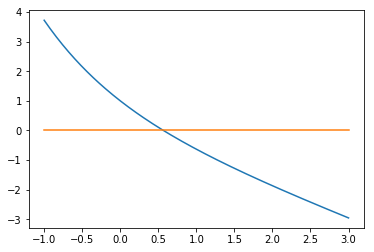

In [3]:

a = 1.0
def f(x):
    return np.exp(-x) - a*x


myx = np.linspace(-1,3,200)
plt.plot(myx, f(myx))
plt.plot(myx, 0*myx)



We therefore see that $f(0)>0$ and $f(2)<0$. This means that (assuming that $f$ is continuous) there is a point $x_0$ in the interval $[0,2]$ such that $f(x_0)=0$. Let us try to find this point through bisection. Let us start with right and left boundaries $l_0=0$ and $r_0=2$. Then evanluate the function at the midpoint $m_0 = (l_0 + r_0)/2$. Then there are two options, if $f(m_0) > 0$ then the next interval is taken as $l_1 = m_0$ and $r_1 = r_0$. Otherwise we choose $l_1 = l_0$ and $r_1 = m_0$. Then we iterate to smaller and smaller intervals.  In python: 

i |l                 |r                 |epsilon           |fm                
 0|               0.0|               2.0|               2.0|-0.6321205588285577
 1|               0.0|               1.0|               1.0|0.10653065971263342
 2|               0.5|               1.0|               0.5|-0.2776334472589853
 3|               0.5|              0.75|              0.25|-0.08973857148100972
 4|               0.5|             0.625|             0.125|0.00728282473092301
 5|            0.5625|             0.625|            0.0625|-0.04149754983697962
 6|            0.5625|           0.59375|           0.03125|-0.01717583918552923
 7|            0.5625|          0.578125|          0.015625|-0.004963760389385841
 8|            0.5625|         0.5703125|         0.0078125|0.0011552020150243925
 9|        0.56640625|         0.5703125|        0.00390625|-0.0019053596128160155
10|        0.56640625|       0.568359375|       0.001953125|-0.00037534916914483407
11|        0.56640625|     

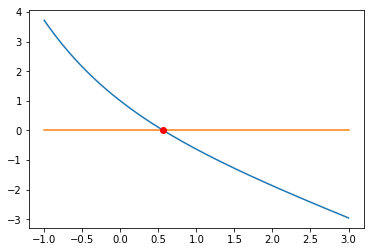

In [4]:
a = 1.0
def f(x):
    return np.exp(-x) - a*x


l,r = 0.0, 2.0 

print("{:2}|{:18}|{:18}|{:18}|{:18}".format("i","l","r","epsilon","fm"))
for i in range(20):
    m = (l+r) / 2.0
    epsilon = r-l
    fm = f(m)
    print("{:2}|{:18}|{:18}|{:18}|{:18}".format(i,l,r,epsilon,fm))
    if fm > 0:
        l = m
    else:
        r = m

myx = np.linspace(-1,3,200)
plt.plot(myx, f(myx))
plt.plot(myx, 0*myx)
plt.plot(m, fm, "ro")


We see that with this method, we improve the precision of our result by a factor of two in every step.  How many steps will we be able to do? Increase the number of iterations, and see what changes:

i |l                 |r                 |epsilon               |fm                
 0|               0.0|               2.0|                   2.0|-0.6321205588285577
 1|               0.0|               1.0|                   1.0|0.10653065971263342
 2|               0.5|               1.0|                   0.5|-0.2776334472589853
 3|               0.5|              0.75|                  0.25|-0.08973857148100972
 4|               0.5|             0.625|                 0.125|0.00728282473092301
 5|            0.5625|             0.625|                0.0625|-0.04149754983697962
 6|            0.5625|           0.59375|               0.03125|-0.01717583918552923
 7|            0.5625|          0.578125|              0.015625|-0.004963760389385841
 8|            0.5625|         0.5703125|             0.0078125|0.0011552020150243925
 9|        0.56640625|         0.5703125|            0.00390625|-0.0019053596128160155
10|        0.56640625|       0.568359375|           0.001953125|-0.

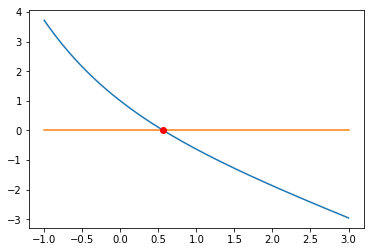

In [5]:
a = 1.0
def f(x):
    return np.exp(-x) - a*x


l,r = 0.0, 2.0 

print("{:2}|{:18}|{:18}|{:22}|{:18}".format("i","l","r","epsilon","fm"))
for i in range(60):
    m = (l+r) / 2.0
    epsilon = r-l
    fm = f(m)
    print("{:2}|{:18}|{:18}|{:22}|{:18}".format(i,l,r,epsilon,fm))
    if fm > 0:
        l = m
    else:
        r = m

myx = np.linspace(-1,3,200)
plt.plot(myx, f(myx))
plt.plot(myx, 0*myx)
plt.plot(m, fm, "ro")

